In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')


In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df=train.drop(['Age','Cabin','Embarked'],1)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


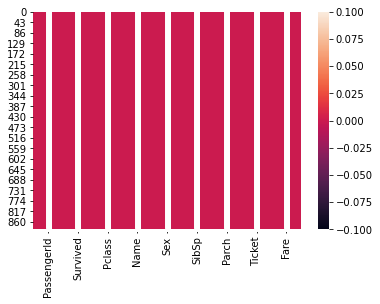

In [12]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df.shape

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


(891, 9)

In [19]:
print(df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))

      Fare   Name  Parch  PassengerId  Pclass    Sex  SibSp  Survived  Ticket
0    False  False  False        False   False  False  False     False   False
1    False  False  False        False   False  False  False     False   False
2    False  False  False        False   False  False  False     False   False
3    False  False  False        False   False  False  False     False   False
4    False  False  False        False   False  False  False     False   False
..     ...    ...    ...          ...     ...    ...    ...       ...     ...
886  False  False  False        False   False  False  False     False   False
887  False  False  False        False   False  False  False     False   False
888  False  False  False        False   False  False  False     False   False
889  False  False  False        False   False  False  False     False   False
890  False  False  False        False   False  False  False     False   False

[891 rows x 9 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [18]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(607, 9)

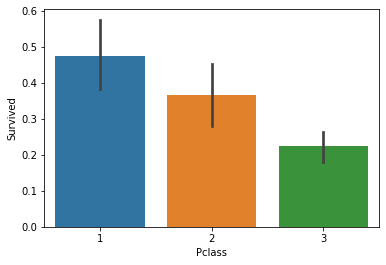

In [47]:
sns.barplot(x='Pclass', y='Survived', data=df_out)